### Manipulando datos categóricos

In [13]:
import pandas as pd

Datos ordinales

In [14]:
df = pd.DataFrame([
    ['verde', 'M', 10.3, 'clase1'],
    ['rojo', 'G', 14.2, 'clase2'],
    ['azul', 'XG', 15.6, 'clase1'],
])

df.columns = ['color', 'talla', 'precio', 'clase']
df

,color,talla,precio,clase
0,verde,M,10.3,clase1
1,rojo,G,14.2,clase2
2,azul,XG,15.6,clase1


In [15]:
import numpy as np

In [16]:
clase_map = {et: ind for ind, et in enumerate(np.unique(df['clase']))}
clase_map

{'clase1': 0, 'clase2': 1}

In [17]:
df.clase = df.clase.map(clase_map)
df

,color,talla,precio,clase
0,verde,M,10.3,0
1,rojo,G,14.2,1
2,azul,XG,15.6,0


In [19]:
talla_map = {et: ind for ind, et in enumerate(np.unique(df.talla))} 
# No sirve por el orden de las tallas M < G < XG
talla_map

{'G': 0, 'M': 1, 'XG': 2}

In [20]:
talla_map = {'M': 0, 'G': 1, 'XG': 2}
talla_map

{'M': 0, 'G': 1, 'XG': 2}

In [21]:
df['talla'] = df['talla'].map(talla_map) #['talla'] es equivalente a .talla
df

,color,talla,precio,clase
0,verde,0,10.3,0
1,rojo,1,14.2,1
2,azul,2,15.6,0


In [22]:
color_map = {et: ind for ind, et in enumerate(np.unique(df.color))}
# No sirve porque no hay un orden en los colores
color_map

{'azul': 0, 'rojo': 1, 'verde': 2}

Datos no ordinales

In [23]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df[['color']])
ohe.transform(df[['color']]).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

Con pandas (Recomendado)

In [24]:
pd.get_dummies(df['color'])

,azul,rojo,verde
0,False,False,True
1,False,True,False
2,True,False,False


In [25]:
pd.get_dummies(df['color'], drop_first=True)

,rojo,verde
0,False,True
1,True,False
2,False,False


### Escalamiento de características

In [27]:
x = np.array([0,1,2,3,4,5,6])
print('Normalizado  :', (x - x.min()) / (x.max() - x.min()))
print('Estandarizado:', (x - x.mean()) / x.std())
print('Normalizer   :', x / np.linalg.norm(x))


Normalizado  : [0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
Estandarizado: [-1.5 -1.  -0.5  0.   0.5  1.   1.5]
Normalizer   : [0.         0.10482848 0.20965697 0.31448545 0.41931393 0.52414242
 0.6289709 ]


### Detección de anomalías

In [29]:
import matplotlib.pyplot as plt

In [30]:
# Conjunto de datos ficticio con distribución normal
data = np.random.randn(50000) * 20 + 20

Histograma

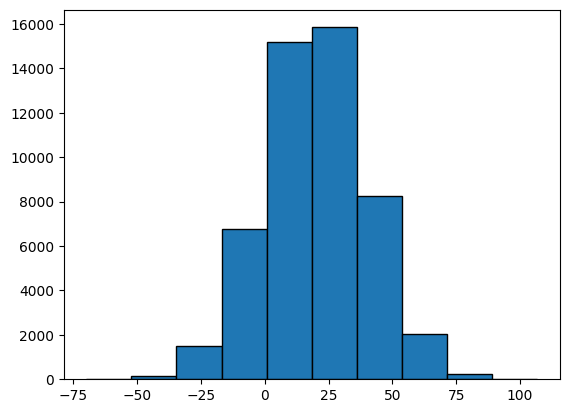

In [32]:
plt.hist(data, edgecolor='black')
plt.show()

Gráfica de cuantiles

In [33]:
import pylab
import scipy.stats as stats

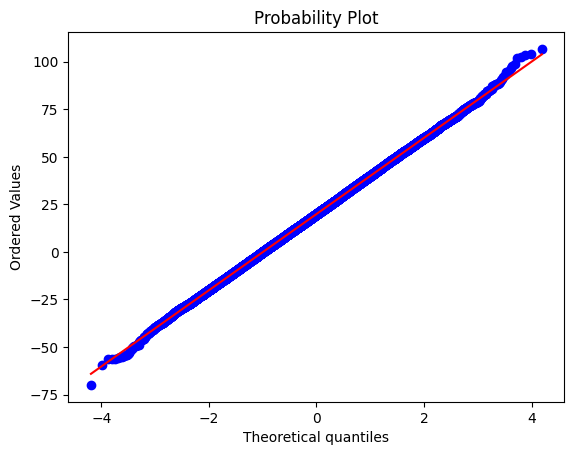

In [35]:
stats.probplot(data, dist='norm', plot=pylab)
pylab.show()

Prueba de Shapiro

In [36]:
_, p_value = stats.shapiro(data)
print('p_value = ', p_value)
# p_value > 0.05 => La distribución es normal

p_value =  0.6211135961004473


C:\Users\denis\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50000.
  res = hypotest_fun_out(*samples, **kwds)
